# imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')
# --------------------------------------------------

# --------------------------------------------------
# load datasets
from sklearn import datasets

# imblearn.sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# preprocessing.encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder # pd.get_dummies
# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# preprocessing.binarizing
from sklearn.preprocessing import Binarizer

# decomposition.PCA
from sklearn.decomposition import PCA
# stats : R module
from scipy.stats import skew, kurtosis

# estimators ---------------------------------------
# estimators.classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # classifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV # regressor 응용
# estimators.regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# --------------------------------------------------

# ensemble -----------------------------------------
# ensemble.bagging
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# ensemble.boosting
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
# ensemble.boosting & bagging
from xgboost import XGBRFClassifier, XGBRFRegressor
# ensemble.voting
from sklearn.ensemble import VotingClassifier, VotingRegressor
# --------------------------------------------------

# metrics ------------------------------------------
# metrics.scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss
# metrics.reports
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# metrics.errors
from sklearn.metrics import mean_squared_error     # 'neg_mean_squared_error', 'neg_root_mean_squared_error'
from sklearn.metrics import mean_squared_log_error # 'neg_mean_squared_log_error'
from sklearn.metrics import mean_absolute_error    # 'neg_mean_absolute_error'
# metrics.curves
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve
# --------------------------------------------------

# model_selection ----------------------------------
# model_selection.splitter
from sklearn.model_selection import train_test_split       # function
# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------


# --------------------------------------------------
def check_nan(df):
    nan = df.isna().sum()[df.isna().sum() != 0]
    nan_cols = list(nan.index)
    nan_cnt  = df[nan_cols].isna().sum()
    rate = round(nan_cnt / df.shape[0] * 100, 2)
    nan_df = pd.DataFrame({'NAN_CNT':nan_cnt, 'RATE':rate})
    
    print(nan_df)
    print('-' * 30)
    print('nan_cols count =', len(nan_cols))
    print(nan_cols)
 
    for col in nan_cols:
        print('-' * 30)
        print(df[col].value_counts())
        print('value_counts =', df[col].count(), '/ nan_counts =', df[col].isna().sum())
    
    return nan_cols
# nan_cols = check_nan(df)
# --------------------------------------------------

# --------------------------------------------------
def check_outliers(X_train, features, rate=1.5):
    
    dict = {}
    
    for col in features:
        
        Q1 = np.percentile(X_train[col], 25) 
        Q3 = np.percentile(X_train[col], 75) 
        IQR = Q3 - Q1
        
        min = Q1 - (rate * IQR)
        max = Q3 + (rate * IQR)
        
        idxs = X_train[(X_train[col] < min) | (X_train[col] > max)].index
        
        dict[col] = idxs
        
    return dict
# check_outliers(X_train, 'Insulin')
# --------------------------------------------------

# --------------------------------------------------
def check_object(df):
    object_cols = list(df.dtypes[df.dtypes == 'object'].index)
    print('object_cols count =', len(object_cols))
    for col in object_cols:
        print('-' * 30)
        print(df[col].value_counts())
    return object_cols
# object_cols = encode(df)
# --------------------------------------------------

# --------------------------------------------------
def mapping(df, col, dict):
    dict = {}
    
    for i in range(len(df[col].value_counts().index)):
        dict[df[col].value_counts().index[i]] = i
    
    df['e_' + col] = df[col].map(dict)
    return df['e_' + col].value_counts()
# mapping(df, 'gender')
# --------------------------------------------------

# --------------------------------------------------
def scores(y_test, y_pred):
    
    """evaluation scores"""
    
    f1        = f1_score         (y_test, y_pred, average='macro')
    accuracy  = accuracy_score   (y_test, y_pred, )
    precision = precision_score  (y_test, y_pred, average='macro')
    recall    = recall_score     (y_test, y_pred, average='macro')
    c_matrix  = confusion_matrix (y_test, y_pred, )
    
    print(
          f'accuracy  = {accuracy:.6f},  '
          f'f1 score  = {f1:.6f},  \n'
          f'precision = {precision:.6f},  '
          f'recall    = {recall:.6f},')
    print(c_matrix)
    
    # plt.figure(figsize=(12, 9))
    # plt.title('confusion matrix')
    # plt.xlabel('Predict')
    # plt.ylabel('Actual')
    # sns.heatmap(c_matrix, annot=True, linewidths=1, cmap='Blues', annot_kws={"size": 14})
    # plt.show()
# --------------------------------------------------

# --------------------------------------------------
def curves(y_test, probas_pred):
        
    FPRS, TPRS, thresholds = roc_curve(y_test, probas_pred[:, 1])
 
    f, ax = plt.subplots(1, 2, figsize=(16, 6))
 
    # settings
    plt.subplot(121)
    plt.title('ROC curve')
    plt.gray()
    plt.xlabel('FPR(1- specificity)')
    plt.ylabel('TPR')
 
    # x, y values
    plt.plot(FPRS, TPRS, label='ROC', linestyle='solid')
    plt.plot([0, 1], [0, 1], label='50%', color='gray', linestyle=':')
    plt.legend()
 
    precisions, recalls, thresholds = precision_recall_curve(y_test, probas_pred[:, 1])
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
 
    plt.subplot(122)
    plt.title('precision recall curve')
    plt.gray()
    plt.xlabel('threshold')
    plt.ylabel('scores')
 
    # x, y values
    plt.plot(thresholds, precisions[:thresholds.shape[0]], label='precision', linestyle=':')
    plt.plot(thresholds, recalls[:thresholds.shape[0]],    label='recall',    linestyle='--')
    plt.plot(thresholds, f1_scores[:thresholds.shape[0]],  label='f1',        linestyle='solid')
    # valid linestyle = '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    plt.legend()
 
    plt.show()
    
    print('AUC = ', roc_auc_score(y_test, probas_pred[:, 1]))
# --------------------------------------------------

## metrics

In [2]:
# # classification cross_validate : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # estimators=
# classification_models = [RandomForestClassifier(random_state=0),
#                          GradientBoostingClassifier(random_state=0),
#                          XGBClassifier(random_state=0),
#                          XGBRFClassifier(random_state=0),
#                          LGBMClassifier(random_state=0),
#                          CatBoostClassifier(random_state=0),
#                          ]

# # scorings=
# classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
#                           'precision':'precision_macro', 'recall':'recall_macro', 
#                           'roc_auc_ovr':'roc_auc_ovr',}

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cross_validate loop
# for model in classification_models:
    
#     cv_results = cross_validate(model, X_met, y_met,
#                                 scoring=classification_scorers,
#                                 cv=skf,
#                                 return_train_score=True, return_estimator=True)
    
#     print('-' * 70)
#     print('model  =', model.__class__.__name__)
#     print('params =', model.get_params(deep=True))
    
#     # classification metrics
#     print('f1_macro  = {}  '.format(cv_results['test_f1_macro'].mean()),
#           'accuracy  = {}  '.format(cv_results['test_accuracy'].mean()), '\n'
#           'precision = {}  '.format(cv_results['test_precision'].mean()),
#           'recall    = {}  '.format(cv_results['test_recall'].mean()), '\n'
#           'AUC_ovr   = {}  '.format(cv_results['test_roc_auc_ovr'].mean()),
#           )
    
#     fi_list = []
#     for idx, estimator in enumerate(cv_results['estimator']):
#         fi = pd.DataFrame(estimator.feature_importances_, 
#                           index=X_met.columns, columns=['importance']).sort_values('importance', ascending=False)
        
#         fi_list.append(estimator.feature_importances_.tolist())
#     fi_means = np.array(fi_list).mean(axis=0)
#     fi_df = pd.DataFrame(fi_means, columns=['importance'], index=X_met.columns).sort_values(by='importance', ascending=False)
#     fig, ax = plt.subplots(figsize=(16, 12))
#     sns.set_theme(style='whitegrid')
#     sns.set_color_codes('pastel')
#     sns.barplot(x='importance', y_met=X_met.columns, data=fi_df)
#     plt.show()

In [3]:
# # classification GridsearchCV : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # models
# classification_models = [RandomForestClassifier(),
#                          GradientBoostingClassifier(),
#                          XGBClassifier(), 
#                          XGBRFClassifier(), 
#                          LGBMClassifier(), 
#                          CatBoostClassifier(),
#                          ]

# # param_grid=
# hyper_param = {'n_estimators':[100],
#                'random_state':[0],
#               #  'min_samples_split':[2],
#               #  'min_samples_leaf':[1],
#                }

# # scoring=
# classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
#                           'precision':'precision_macro', 'recall':'recall_macro', 
#                           'roc_auc_ovr':'roc_auc_ovr',}

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cv_results_ cols
# classification_cols = ['mean_test_f1_macro', 'mean_test_accuracy', 
#                        'mean_test_precision', 'mean_test_recall', 'mean_test_roc_auc_ovr',]

# # GridSearchCV loop
# for model in classification_models:
        
#         gscv = GridSearchCV(model, param_grid=hyper_param, 
#                             scoring=classification_scorers, refit='f1_macro', 
#                             cv=skf, return_train_score=True)
#         gscv.fit(X_met, y_met)
#         results = gscv.cv_results_
        
#         print('-' * 75)
#         print('estimtor        =', gscv.estimator)
#         print('best_params_    =', gscv.best_params_)
#         print('best_score_     =', gscv.best_score_)
        
#         met_df = pd.DataFrame(results)[classification_cols]
#         met_df.columns = ['f1_macro', 'accuracy', 'precision', 'recall', 'auc_ovr',]
#         print(met_df)

In [4]:
# # regression cross_validate : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # estimators=
# regressor_models = [
#                     # LinearRegression(),
#                     # RandomForestRegressor(random_state=0),
#                     Ridge(random_state=0),
#                     Lasso(random_state=0),
#                     ElasticNet(random_state=0),
#                     DecisionTreeRegressor(random_state=0),
#                     XGBRegressor(random_state=0),
#                     LGBMRegressor(random_state=0),
#                     # CatBoostRegressor(random_state=0),
#                     ]

# # scorings=
# regressor_scorers = {'MSE':'neg_mean_squared_error',
#                      'RMSE':'neg_root_mean_squared_error',
#                     #  'MSLE':'neg_mean_squared_log_error',
#                     #  'MAE':'neg_mean_absolute_error',
#                      }

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cross_validate loop
# for model in regressor_models:
    
#     cv_results = cross_validate(model, X_met, y_met,
#                                 scoring=regressor_scorers,
#                                 cv=kf,
#                                 return_train_score=True, return_estimator=True)
    
#     print('-' * 40)
#     print('model  =', model.__class__.__name__)
#     # print('params =', model.get_params(deep=True))
    
#     # regression metrics
#     print('MSE    = {}  '.format(- cv_results['test_MSE'].mean()), '\n'
#           'RMSE   =  {}  '.format(- cv_results['test_RMSE'].mean()),
#         #   'MSLE   = {}  '.format(- cv_results['test_MSLE'].mean()),
#         #   'MAE    = {}  '.format(- cv_results['test_MAE'].mean()),
#           )

In [5]:
# # regression GridsearchCV : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # models
# regressor_models = [
#                     # LinearRegression(),
#                     # RandomForestRegressor(),
#                     Ridge(),
#                     Lasso(),
#                     ElasticNet(),
#                     DecisionTreeRegressor(),
#                     XGBRegressor(),
#                     LGBMRegressor(),
#                     # CatBoostRegressor(),
#                     ]

# # param_grid=
# hyper_param = {
#                'random_state':[0],
#                }

# # scoring=
# regressor_scorers = {'MSE':'neg_mean_squared_error',
#                      'RMSE':'neg_root_mean_squared_error',
#                     #  'MSLE':'neg_mean_squared_log_error',
#                     #  'MAE':'neg_mean_absolute_error',
#                      }

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cv_results_ cols
# regression_cols = ['mean_test_MSE', 'mean_test_RMSE', 
#                 #    'mean_test_MSLE', 'mean_test_MAE',
#                    ]

# # GridSearchCV loop
# for model in regressor_models:
        
#         gscv = GridSearchCV(model, 
#                             param_grid=hyper_param, 
#                             scoring=regressor_scorers, refit='RMSE', 
#                             cv=kf, return_train_score=True)
#         gscv.fit(X_met, y_met)
#         results = gscv.cv_results_
        
#         print('-' * 40)
#         print('estimtor        =', gscv.estimator.__class__.__name__)
#         print('best_params_    =', gscv.best_params_)
#         print('best_score_     =', - gscv.best_score_)
        
#         met_df = pd.DataFrame(results)[regression_cols]
#         met_df.columns = ['MSE', 'RMSE', 
#                         #   'MSLE', 'MAE',
#                           ]
#         print(- met_df)

# bias, var trade-off
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FmuWZE%2FbtqCM8OmMzo%2FLaQnhfMmFantBha1wECaI1%2Fimg.jpg'><br>

<img src='https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjJfMjMg/MDAxNTYzNzk3Nzc0NDcw.VdLhR996Ys1uG0V5R_9UD6Wg4jZL3dI_3Phnu13mdY4g.OkHU-OcxcVk4R4KU7bI_xHCUEKh8Gfs_stvNrmBH02Ig.PNG.ckdgus1433/image.png?type=w800'>

# regressor

In [6]:
boston = datasets.load_boston()
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['target'] = boston['target']

y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
models = [Ridge(), Lasso(), ElasticNet()]

for model in models:
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse  = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print(f'MSE = {mse:.10f}, RMSE = {rmse:.10f}, '
          f'{model.__class__.__name__}')

MSE = 34.2316061106, RMSE = 5.8507782483, Ridge
MSE = 41.7000967999, RMSE = 6.4575612115, Lasso
MSE = 40.6653320777, RMSE = 6.3769375156, ElasticNet


# regulations : L1, L2

------------------------------------------------------------------------------------------
alpha = 0
Lasso MSE = 33.4489799977, Lasso RMSE = 33.4489799977, Lasso intercept = 38.0916949263
Ridge MSE = 33.4489799977, Ridge RMSE = 33.4489799977, Ridge intercept = 38.0916949263



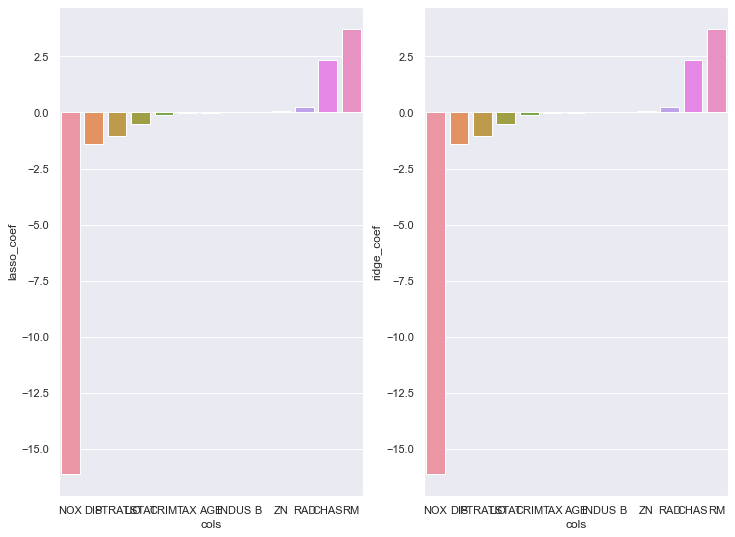

------------------------------------------------------------------------------------------
alpha = 0.5
Lasso MSE = 37.8032841098, Lasso RMSE = 37.8032841098, Lasso intercept = 36.2201454613
Ridge MSE = 33.9027451724, Ridge RMSE = 33.9027451724, Ridge intercept = 34.6768678573



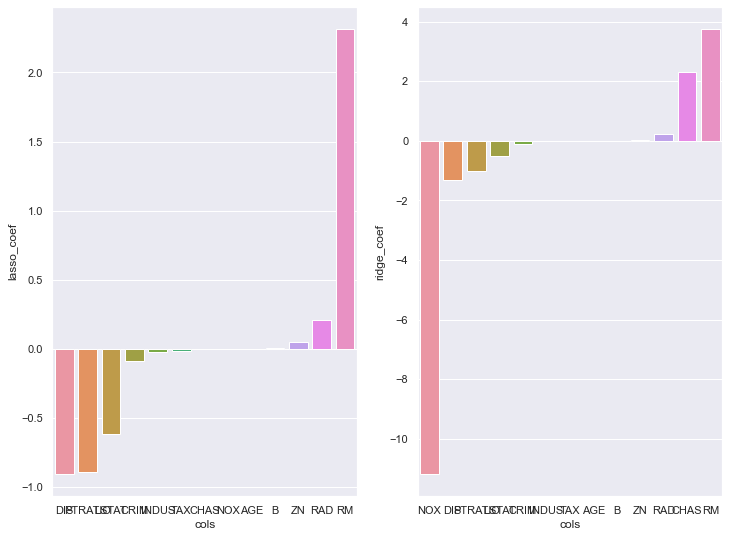

------------------------------------------------------------------------------------------
alpha = 1
Lasso MSE = 41.7000967999, Lasso RMSE = 41.7000967999, Lasso intercept = 45.8312604746
Ridge MSE = 34.2316061106, Ridge RMSE = 34.2316061106, Ridge intercept = 32.9362057338



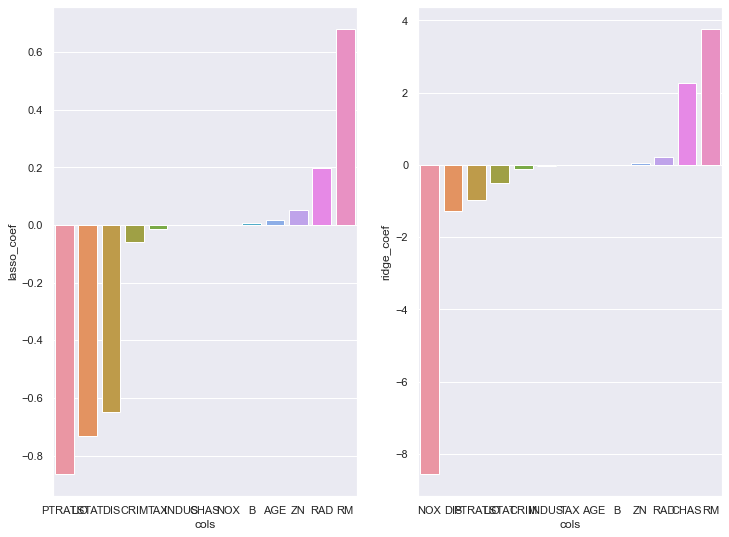

------------------------------------------------------------------------------------------
alpha = 1.5
Lasso MSE = 44.9161526096, Lasso RMSE = 44.9161526096, Lasso intercept = 47.5822676821
Ridge MSE = 34.4679634089, Ridge RMSE = 34.4679634089, Ridge intercept = 31.9132276785



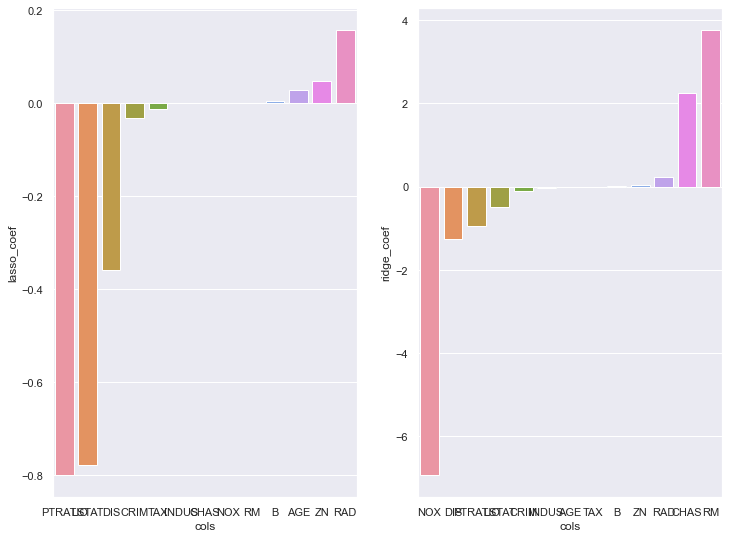

------------------------------------------------------------------------------------------
alpha = 2
Lasso MSE = 46.9098018807, Lasso RMSE = 46.9098018807, Lasso intercept = 43.7765893332
Ridge MSE = 34.6444380035, Ridge RMSE = 34.6444380035, Ridge intercept = 31.2630151189



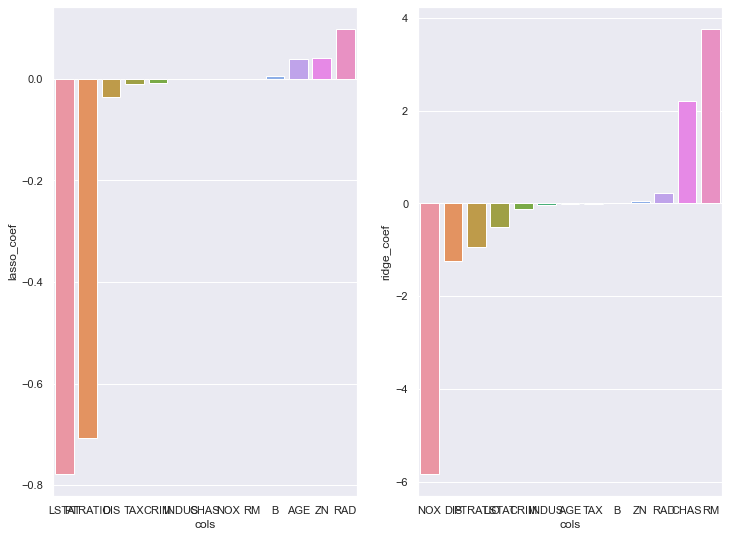

------------------------------------------------------------------------------------------
alpha = 2.5
Lasso MSE = 47.8786945007, Lasso RMSE = 47.8786945007, Lasso intercept = 41.0320442378
Ridge MSE = 34.7812761742, Ridge RMSE = 34.7812761742, Ridge intercept = 30.8308020812



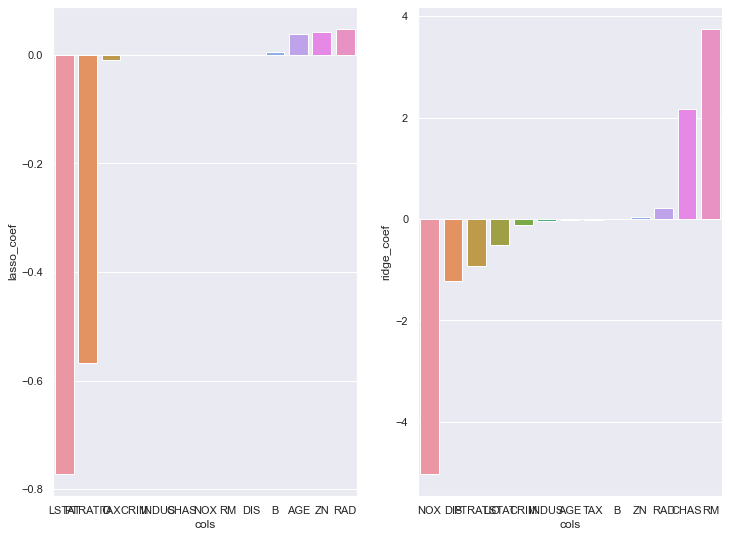

------------------------------------------------------------------------------------------
alpha = 3
Lasso MSE = 48.7444872924, Lasso RMSE = 48.7444872924, Lasso intercept = 38.4099763406
Ridge MSE = 34.8908558224, Ridge RMSE = 34.8908558224, Ridge intercept = 30.5368167607



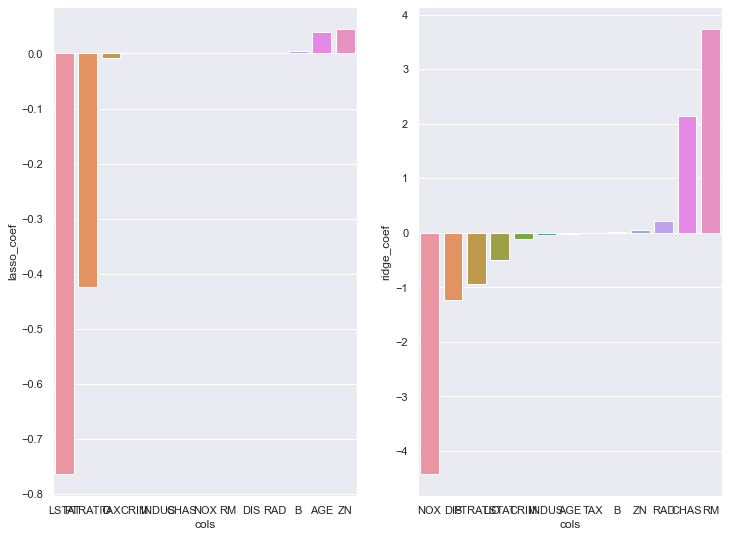

In [8]:
from sklearn.linear_model import lasso_path, lars_path

alphas = [0, 0.5, 1, 1.5, 2, 2.5, 3]

for a in alphas:
      
      print('-' * 90)
      lasso_model = Lasso(alpha=a, normalize=False, max_iter=1000, random_state=0)
      ridge_model = Ridge(alpha=a, normalize=False, max_iter=1000, random_state=0)
      lasso_model.fit(X_train, y_train)
      ridge_model.fit(X_train, y_train)
      y_pred_l1  = lasso_model.predict(X_test)
      y_pred_l2  = ridge_model.predict(X_test)
      lasso_mse  = mean_squared_error(y_test, y_pred_l1)
      ridge_mse  = mean_squared_error(y_test, y_pred_l2)
      lasso_rmse = mean_squared_error(y_test, y_pred_l1)
      ridge_rmse = mean_squared_error(y_test, y_pred_l2)
      print('alpha =', a)
      print(f'Lasso MSE = {lasso_mse:.10f}, Lasso RMSE = {lasso_rmse:.10f}, Lasso intercept = {lasso_model.intercept_:.10f}\n'
            f'Ridge MSE = {ridge_mse:.10f}, Ridge RMSE = {ridge_rmse:.10f}, Ridge intercept = {ridge_model.intercept_:.10f}\n')
      lasso_coef = lasso_model.coef_
      ridge_coef = ridge_model.coef_
      coef_df = pd.DataFrame({'cols':X_train.columns, 
                              'lasso_coef':lasso_coef, 
                              'ridge_coef':ridge_coef,
                              })
      
      # plot coef
      fig, ax = plt.subplots(1, 2, figsize=(12, 9))
      sns.barplot(data=coef_df.sort_values('lasso_coef'), x='cols', y='lasso_coef', ax=ax[0])
      sns.barplot(data=coef_df.sort_values('ridge_coef'), x='cols', y='ridge_coef', ax=ax[1])
      plt.show()

# ensemble

In [9]:
# 이론상으로는 강한 소수의 모델들보다, 약한 다수의 모델이 나음
# 강한 모델들은 하나만 사용하더라도, 오버피팅 나기 쉬움
# 하지만, 공모전에서는 새로운 데이터를 받을 수 없는 제약
# 모델마다 같은 답변이 아니라, 다른 답변을 낼 때 사용
# 강한 모델들로 앙상블할 때는 점수가 좋은 쪽으로 가중치 조정

# bootstrap : 앙상블의 샘플 추출 방법
# .632 법칙 : 63%는 새로운 데이터, 37%는 중복 추출됨. 오버피팅 피할 수 있는 방법
# out-of-bag error : 학습되지 않은 데이터로 테스트

## boosting

In [10]:
# DecisionTree의 가지를 가중치에 따라 강화하며 학습
# 강화할 수록 약한 가지들이 제거되면서,
# max_depth가 작아지고, 학습 시간도 단축됨

gbr = GradientBoostingRegressor(
                                loss='ls', 
                                learning_rate=0.1, 
                                n_estimators=100,
                                subsample=1.0, 
                                criterion='friedman_mse', 
                                min_samples_split=2,
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.,
                                max_depth=3, 
                                random_state=0,
                                max_features=None, 
                                alpha=0.9, 
                                verbose=1, 
                                )

y_pred = gbr.fit(X_train, y_train).predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'MSE  = {mse}  \nRMSE =  {rmse}')

      Iter       Train Loss   Remaining Time 
         1          71.7310            0.10s
         2          60.8249            0.10s
         3          51.5626            0.10s
         4          44.0327            0.12s
         5          37.6414            0.11s
         6          32.4430            0.11s
         7          28.1591            0.11s
         8          24.6021            0.10s
         9          21.3409            0.10s
        10          18.7694            0.10s
        20           7.2784            0.09s
        30           4.5357            0.08s
        40           3.3404            0.07s
        50           2.7467            0.06s
        60           2.3523            0.05s
        70           2.0866            0.04s
        80           1.8984            0.02s
        90           1.7100            0.01s
       100           1.5339            0.00s
MSE  = 17.774577313016604  
RMSE =  4.2159906680419255


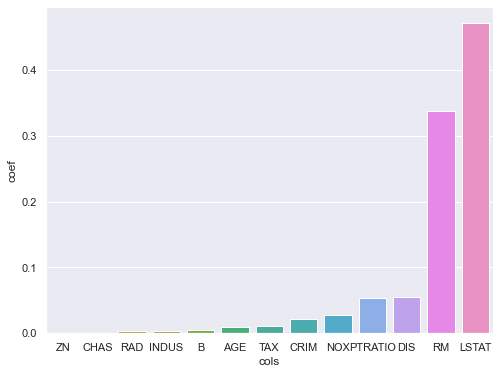

In [11]:
gbr_fi = gbr.feature_importances_
gbr_fi_df = pd.DataFrame({'cols':X_train.columns, 'coef':gbr_fi})
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=gbr_fi_df.sort_values('coef'), x='cols', y='coef')
plt.show()

MSE       = 38.507468536702866 
RMSE      =  6.205438625649509 
intercept = 14.7492


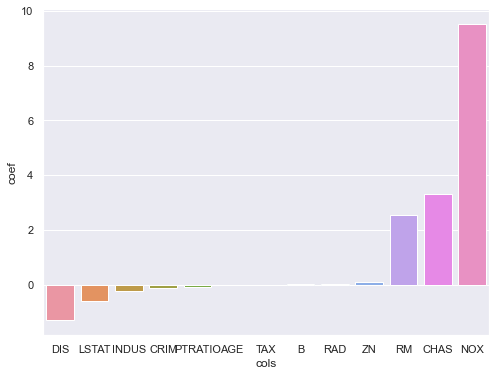

In [12]:
xgbr = XGBRegressor(
                    max_depth=None,
                    learning_rate=None,
                    n_estimators=100,
                    verbosity=1,
                    booster='gblinear',
                    reg_alpha=None,
                    reg_lambda=None,
                    random_state=None,
                    )

y_pred = xgbr.fit(X_train, y_train).predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'MSE       = {mse} \nRMSE      =  {rmse} \n'
# booster='gblinear'
      f'intercept = {xgbr.intercept_[0]}')

# plot coef
coef_df = pd.DataFrame({'cols':X_train.columns, 'coef':xgbr.coef_})
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=coef_df.sort_values('coef'), x='cols', y='coef')
plt.show()

## bagging

In [15]:
# 단일 estimator, bootstrap data

br = BaggingRegressor(
                      base_estimator=xgbr,
                      n_estimators=10,
                      max_samples=1.0,
                      max_features=1.0,
                      bootstrap=True,
                      bootstrap_features=False, # 중요도가 높은 feature
                      oob_score=False,          # out-of-bag
                      random_state=0,
                      verbose=1,
                      )

br.fit(X_train, y_train)
y_pred = br.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(mse, rmse)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


37.90384544964306 6.156609899095692


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


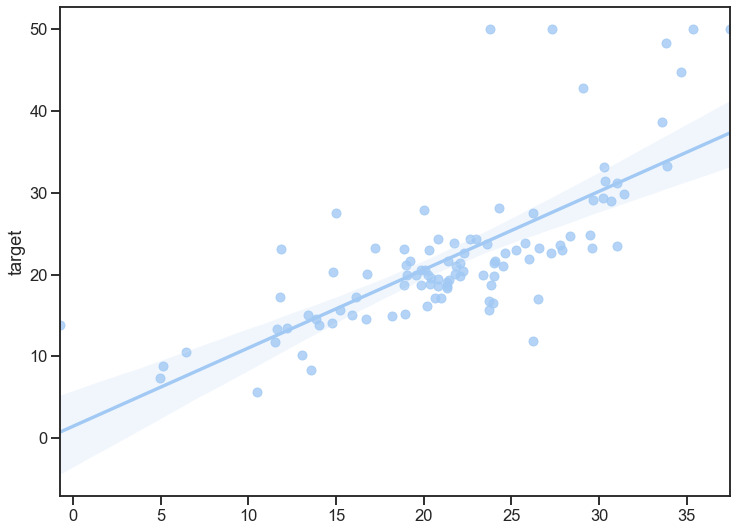

In [68]:
sns.set_theme(context='talk', style='ticks', palette='pastel')
f = plt.figure(figsize=(12, 9))
sns.regplot(x=y_pred, y=y_test);

## voting

[Voting] ....................... (1 of 7) Processing lr, total=   0.0s
[Voting] ...................... (2 of 7) Processing dtr, total=   0.0s
[Voting] ...................... (3 of 7) Processing rfr, total=   0.5s
      Iter       Train Loss   Remaining Time 
         1          71.7310            0.10s
         2          60.8249            0.10s
         3          51.5626            0.16s
         4          44.0327            0.14s
         5          37.6414            0.13s
         6          32.4430            0.14s
         7          28.1591            0.13s
         8          24.6021            0.14s
         9          21.3409            0.13s
        10          18.7694            0.13s
        20           7.2784            0.10s
        30           4.5357            0.09s
        40           3.3404            0.10s
        50           2.7467            0.08s
        60           2.3523            0.06s
        70           2.0866            0.05s
        80           

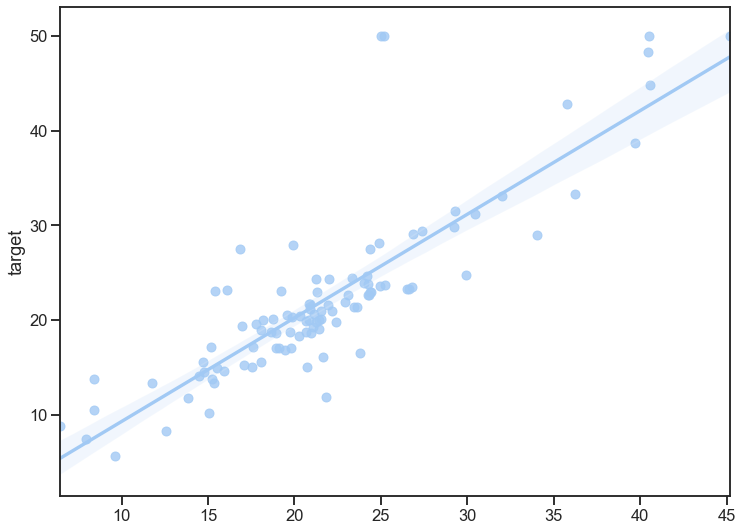

In [72]:
# hard voting : 다수결 투표, 확실한 예측을 반영하지 못함
# soft voting : 기본값, 각 레이블 예측 확률의 평균으로 결정


lr  = LinearRegression(fit_intercept=True, normalize=False)
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100, random_state=0,)

# boosting 계열은 sample 3000 이상 권장
lgbmr = LGBMRegressor()
cbr   = CatBoostRegressor(verbose=False)

# hard voting
vr = VotingRegressor(estimators=[('lr', lr),
                                 ('dtr', dtr),
                                 ('rfr', rfr),
                                 ('gbr', gbr),
                                 ('xgbr', xgbr),
                                 ('lgbmr', lgbmr),
                                 ('cbr', cbr)
                                 ],
                     verbose=True,
                    #  weights=[], # 가중치 조정
                     )

y_pred = vr.fit(X_train, y_train).predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(mse, rmse)

sns.set_theme(context='talk', style='ticks', palette='pastel')
f = plt.figure(figsize=(12, 9))
sns.regplot(x=y_pred, y=y_test); plt.show()